# Two-Patch Tri-Trophic Food Web Simulation

In this notebook, we simulate a two-patch tri-trophic food web ecosystem model. The abundances of adult predator fish, forage fish, and juvenile predator fish species is plotted over time by numerically solving the system of differential equations that govern the system's behavior. This ecosystem exhibit alternative stable states (regimes) depending on the value of "fishing effort" ($e$): predator fish dominant regime or forage fish dominant regime.  In our simulation, we begin with a predator dominant regime with low fishing effort ($e=0.1$). We slowly increase fishing effort (to $e=0.20$) over the span of 2000 units of time. At a sufficiently high level of fishing effort, the ecosystem will tip over to a forage fish dominant regime.

### Importing Packages

In [67]:
import Pkg

Pkg.add("Plots"); using Plots
Pkg.add("DifferentialEquations"); using DifferentialEquations

   Resolving package versions...
  No Changes to `C:\Users\T_kolla\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\T_kolla\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\T_kolla\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\T_kolla\.julia\environments\v1.8\Manifest.toml`


### Model Specifications

In [143]:
#Two-patch tri-trophic food web modeled as a vector field
function VF!(dz, z, p, t)
    p₁, p₂, p₃ = p             #Parameters
    u₁, u₂, u₃, u₄, u₅, u₆ = z #State Variables
    
    # Fishing effort gradually increasing from 0 to 0.2 over the simulation
    e = 0.1*(t/t_f)

    #Adult Predator Equations
    dz[1] = u₅/tmat - m*u₁ - (e + 0.1)*u₁ + s + p₁*u₂ - p₁*u₁*p₃  #Littoral
    dz[2] = u₆/tmat - m*u₂ - (e + 0.1)*u₂ + s - p₁*u₂ + p₁*u₁*p₃  #Pelagic

    #Forage Fish Equations
    dz[3] = r*u₃ - b*u₃*u₃ - h/p₂*u₁*u₃ + i + ϵ*k/p₂*u₃*u₅ + p₁*u₄ - p₁*u₃   #Littoral    
    dz[4] = r*u₄ - b*u₄*u₄ - h*u₂*u₄    + i + ϵ*k*u₄*u₆    - p₁*u₄ + p₁*u₃ #Pelagic 
    
    #Juvenile Predator Equations
    dz[5] = f*(u₁+γ*u₂) + ϵ*(h/p₂*u₁*u₃ + h*u₂*u₄)  - u₅/tmat - m*u₅ - c*u₁*u₅ - k/p₂*u₃*u₅ + p₁*u₆*p₃ - p₁*u₅    #Littoral
    dz[6] = -u₆/tmat    - m*u₆ - c*u₂*u₆ - k*u₄*u₆  - p₁*p₃*u₆ + p₁*u₅                                            #Pelagic
    return dz
end

#Constants 
const m    = 0.250 #Mortality P and J
const s    = 0.050 #Stocking P
const f    = 1.000 #Fecundity
const c    = 0.100 #cannibalism
const k    = 1.000 #Attack rate F on J
const r    = 0.500 #Forage fish growth rate
const b    = 0.050 #Density dependent constant forage fish
const h    = 1.500 #Attack rate P on F
const i    = 0.050 #Stocking F
const ϵ    = 0.250 #Trophic Efficiency
const γ    = 1.000 #Area Ratio
const tmat = 5.000 #Maturation time for juveniles to adult predators

#State Variables
u₀ = zeros(Float64,6)
u₀[1] = 1.000 #Adult Predator; Littoral
u₀[2] = 1.000 #Adult Predator; Pelagic 
u₀[3] = 1.000 #Forage Fish; Littoral
u₀[4] = 1.000 #Forage Fish; Pelagic 
u₀[5] = 1.000 #Juvenile Predator; Littoral
u₀[6] = 1.000 #Juvenile Predator; Pelagic 

#Parameters
p    = zeros(Float64,4)
p[1] = 1.000 #Dispersal rate
p[2] = 1.000 #Refuging strength
p[3] = 1.000 #Movement Bias

#Timespan
tᵢ  = 0.000 #Initial Time
t_f = 2000.000 #Final Time
tspan = (tᵢ,t_f)

(0.0, 2000.0)

### Simulation

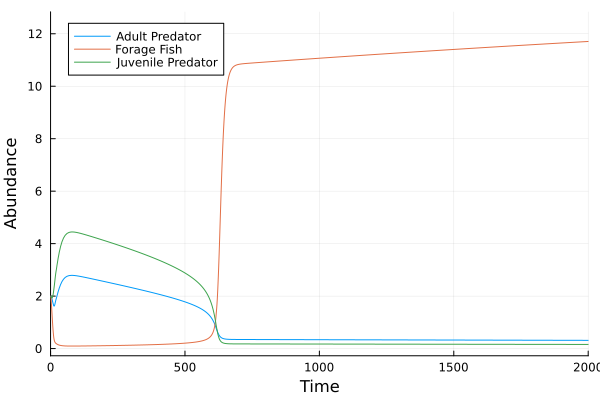

Final Adult Predator Abundance: 0.28539024383217104
Final Forage Fish Abundance: 12.465866973787962
Final Juvenile Predator Abundance: 0.14191615489038742


In [144]:
prob = ODEProblem(
    VF!,   #Vector Field
    u₀,    #Initial Conditions State Variables
    tspan, #Time Interval
    p)     #Initial Conditions Parameters

solution = solve(prob,Tsit5()) 

# Combining solution components
Predator = solution[1,:] .+ solution[2,:]
Forager  = solution[3,:] .+ solution[4,:]
Juvenile = solution[5,:] .+ solution[6,:]

# Plotting
p = plot()
plot!(Predator, label="Adult Predator")
plot!(Forager, label="Forage Fish")
plot!(Juvenile, label="Juvenile Predator")
xlabel!(p, "Time")
ylabel!(p, "Abundance")
xlims!(0,2000)

display(p)
println("Final Adult Predator Abundance: " * string(last(Predator)))
println("Final Forage Fish Abundance: " * string(last(Forager)))
println("Final Juvenile Predator Abundance: " * string(last(Juvenile)))
